# aula = "Projetos de Clusterização"



## Como construir Projetos de Clusterização

O Processo de segmentar e agrupar objetos faz parte de como o cerébro humano processa o mundo. Quando, por exemplo, queremos aprender uma nova matéria, faz parte do processo separar o conteúdo em partes, que podem ser sequênciais ou não.

Podemos pensar na forma como lidamos com música em nosso dia a dia. Podemos agrupar músicas por década de lançamento, artista, gênero, entre outros critérios. O importante é que ao agruparmos as músicas dessa maneira, se torna mais fácil lidar com a quantidade de músicas que existem e são lançadas anualmente. 

A Análise de Clusters é o processo de estruturar e expandir essa habilidade humana fazendo uso do Aprendizado de Máquina. Através de algoritmos e métodos estatísticos tornamos o processo de encontrar grupos escalável e reprodutível.

**Definição:** *"Encontrar grupos de objetos de tal forma que objetos em um grupo sejam similares (ou relacionados) um ao outro e diferentes de (ou não relacionados) a objetos em outros grupos." (Tan et al., 2006)*


Quando falamos do processo de encontrar clusters por meio de Clusterização é importante termos em mente que os clusters a serem encontrados dependem de uma série de fatores. A escolha de algoritmo, parâmetros e a forma de avaliação tem relação direta com o resultado desse processo.


### CRISP-DM










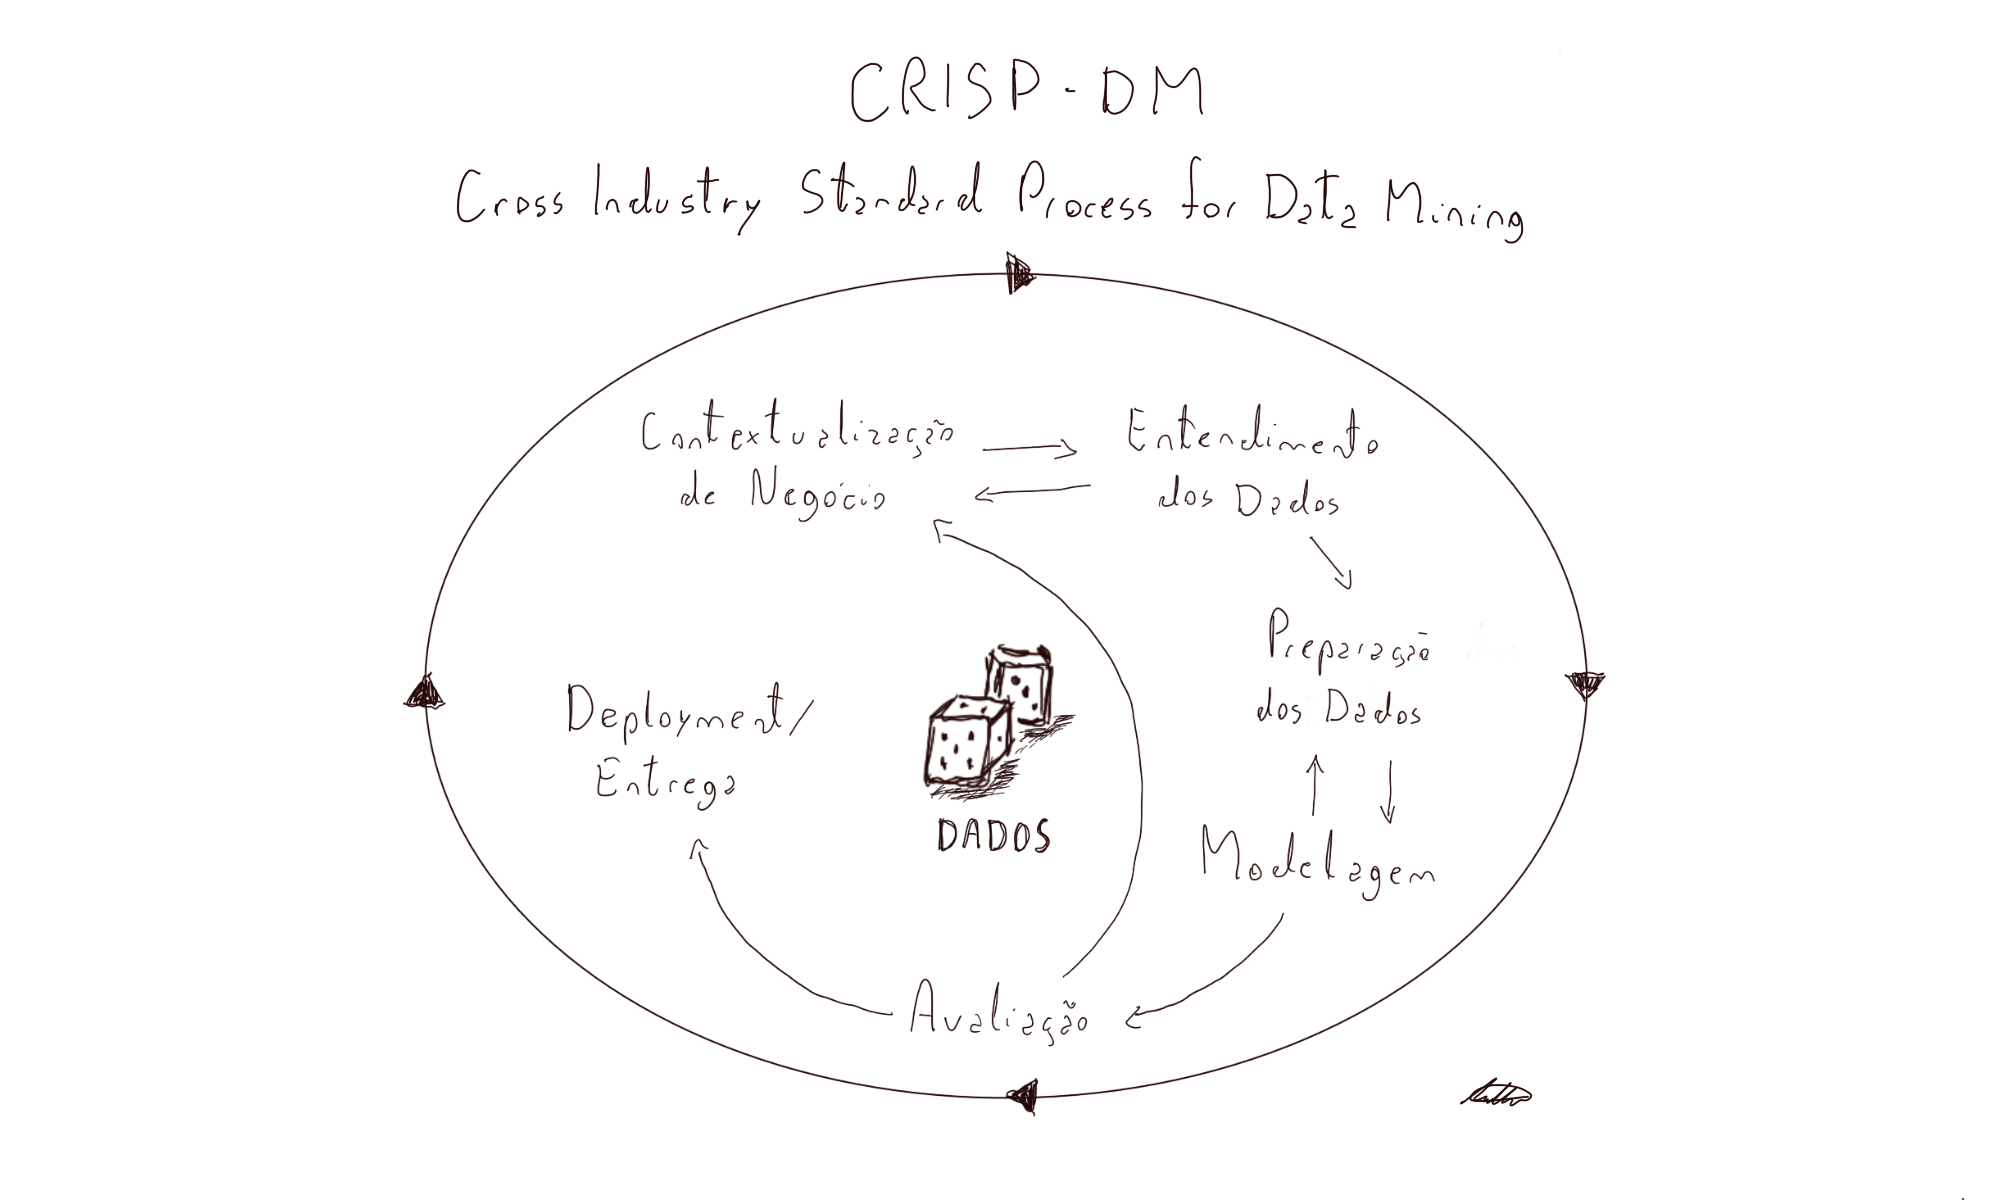

In [1]:
from IPython.display import Image
Image(filename='data/img/crispdm.png', width=1000) 

Quando passamos a pensar em Clustering como um Projeto de Ciência de Dados, podemos expandir esses passos e considerar a estrutura da **Metodologia CRISP-DM**:
* Contextualização de Negócios
* Entendimento dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação
* Deployment/Entrega


### Etapas da análise de clusters
* Representação do Problema
* Selecionar Medida de Proximidade
* Selecionar Algoritmo
* Avaliar Grupos encontrados

## Identificação de Animais no Zoológico

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Quando passamos a pensar em Clustering como um Projeto de Ciência de Dados, podemos expandir esses passos e considerar a estrutura da **Metodologia CRISP-DM**:
* Contextualização de Negócios
* Entendimento dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação
* Deployment/Entrega




In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import combinations
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/zoo/zoo.csv')
df.head()

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
0,porco formigueiro,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
1,antílope,1,0,0,1,0,0,0,1,1,1,0,0,1,4,1
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
3,urso,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
4,javali,1,0,0,1,0,0,1,1,1,1,0,0,1,4,1


In [3]:
df.shape

(101, 16)

In [4]:
tipo = {1:'mamifero', 2:'passaro', 3:'reptil',
       4:'peixe', 5:'anfibio', 6:'inseto', 7:'invertebrado'}

In [5]:
comb_var = list(combinations(df.columns[1:-2], 2))
result = []

for c in comb_var:
    if c[0] != c[1]:
        sim = sum((df[c[0]] != df[c[1]]))/len(df)
        result.append((c[0], c[1], sim))

In [6]:
df_res = pd.DataFrame(result, columns = ['var1', 'var2', 'metrica'])
df_res.sort_values(by=['metrica'])

,var1,var2,metrica
2,pelos,leite,0.059406
71,espinha_dorsal,cauda,0.099010
14,penas,salta,0.118812
55,aquatico,nadadeiras,0.188119
36,leite,dentes,0.217822
...,...,...,...
69,espinha_dorsal,venenoso,0.821782
53,aquatico,respira,0.831683
73,respira,nadadeiras,0.881188
1,pelos,ovos,0.910891


In [7]:
df[df['aquatico'] ==1]

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
7,carpa,0,0,1,0,0,1,0,1,1,0,0,1,1,0,4
8,bagre,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
14,caranguejo,0,0,1,0,0,1,1,0,0,0,0,0,0,4,7
15,lagostim,0,0,1,0,0,1,1,0,0,0,0,0,0,6,7
18,cação,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
19,golfinho,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1
21,pato,0,1,1,0,1,1,0,0,1,1,0,0,1,2,2
25,sapo,0,0,1,0,0,1,1,1,1,1,0,0,0,4,5


In [8]:
df_new = df.drop(columns = ['leite', 'ovos'])

In [9]:
X = df_new.iloc[:, 1:-1]
X

,pelos,penas,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas
0,1,0,0,0,1,1,1,1,0,0,0,4
1,1,0,0,0,0,1,1,1,0,0,1,4
2,0,0,0,1,1,1,1,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,0,0,4
4,1,0,0,0,1,1,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,0,1,1,1,0,0,1,2
97,1,0,1,0,0,0,0,1,1,0,0,6
98,1,0,0,0,1,1,1,1,0,0,1,4
99,0,0,0,0,0,0,0,1,0,0,0,0


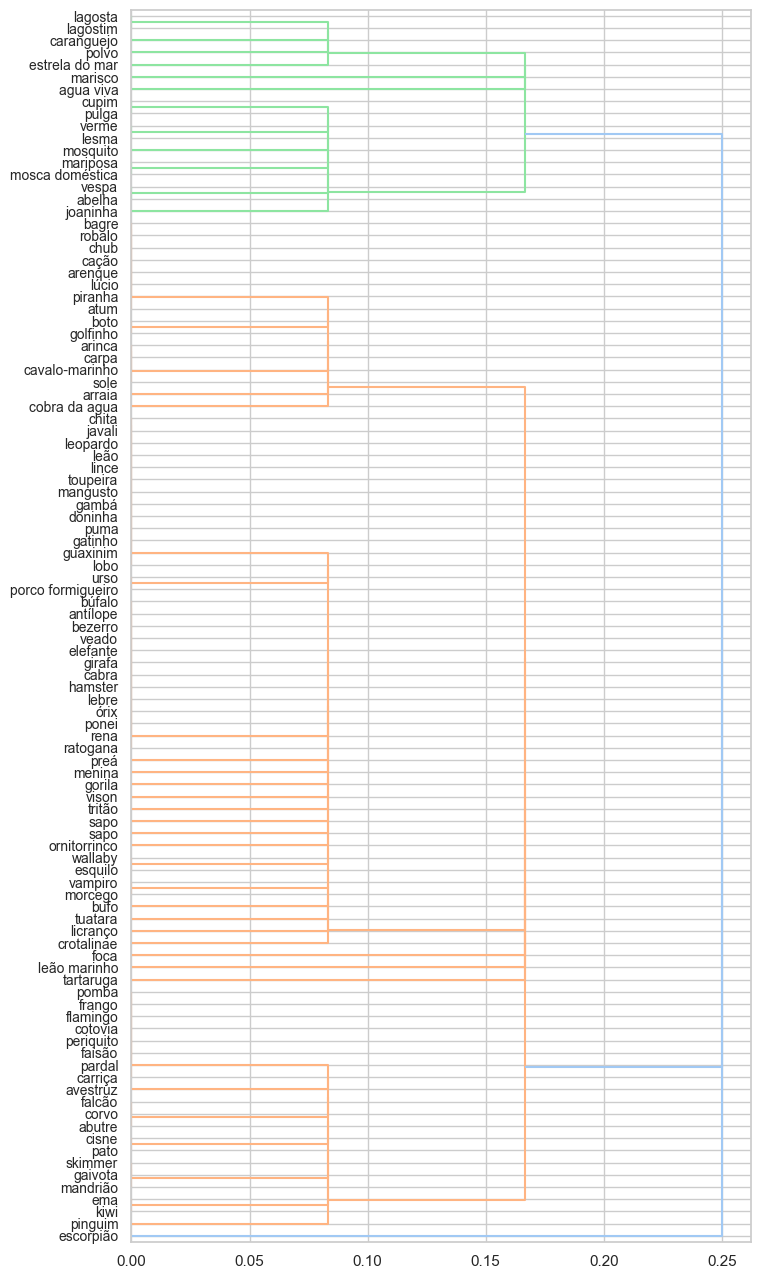

In [10]:
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [11]:
fcluster(Z, .1, criterion='distance')

array([ 2,  2,  3,  2,  2,  2,  2,  3,  3,  2,  2,  1,  3,  9,  8,  8,  1,
        2,  3,  3,  1,  1,  2,  1,  7,  2,  2,  2,  2,  2,  7,  2,  2,  1,
        3,  2,  2,  1,  3,  7,  7,  1,  7,  1,  2,  2,  8,  2,  2,  2,  2,
        7,  2,  8,  2,  2,  1,  1,  1,  1,  3,  3,  2,  2,  2,  2,  3,  2,
        2,  2,  2,  1, 11,  3,  4,  5,  3, 10,  1,  1,  2,  7,  3,  1,  2,
        8,  3,  1,  7,  2,  6,  2,  3,  2,  2,  1,  2,  7,  2,  7,  1],
      dtype=int32)

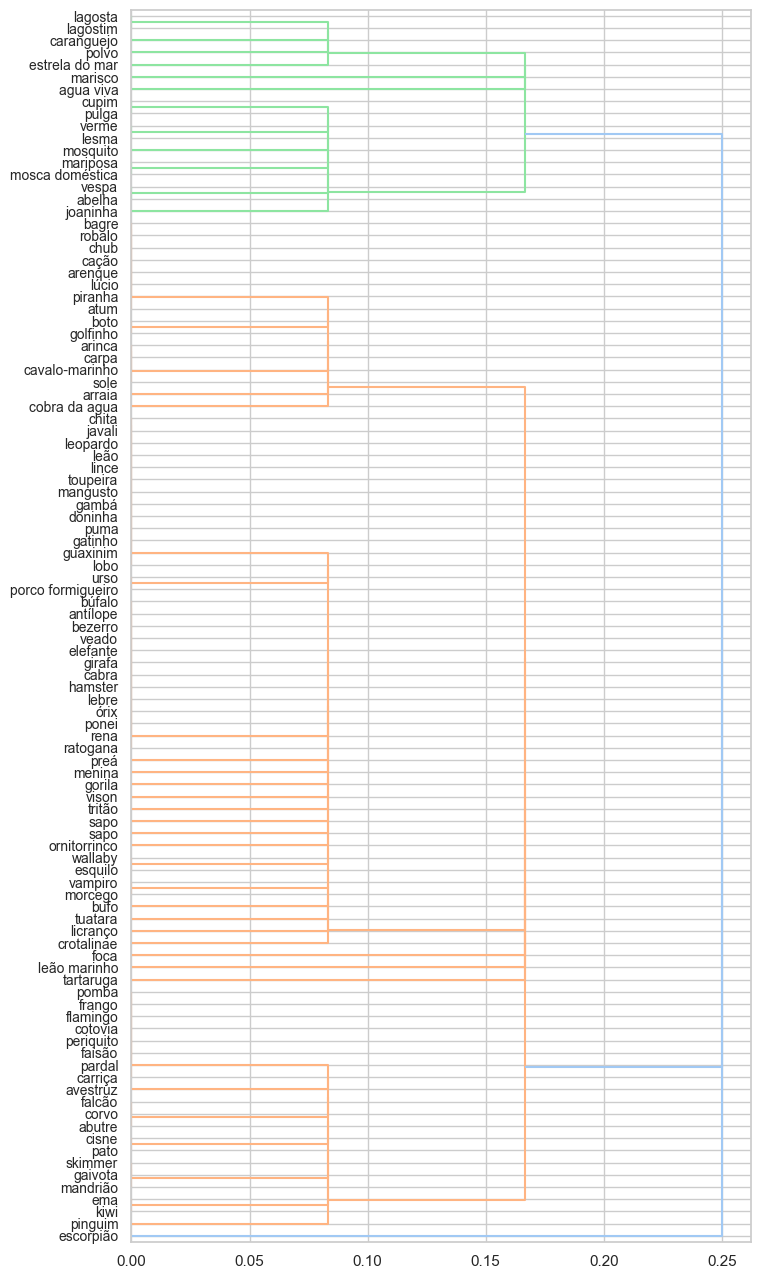

In [13]:
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [14]:
df[df.animal == 'escorpião']

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
72,escorpião,0,0,0,0,0,0,1,0,0,1,1,0,1,8,7


In [15]:
df_temp = df[df.animal != 'escorpião']
X = df_temp.iloc[:, 1:-1]

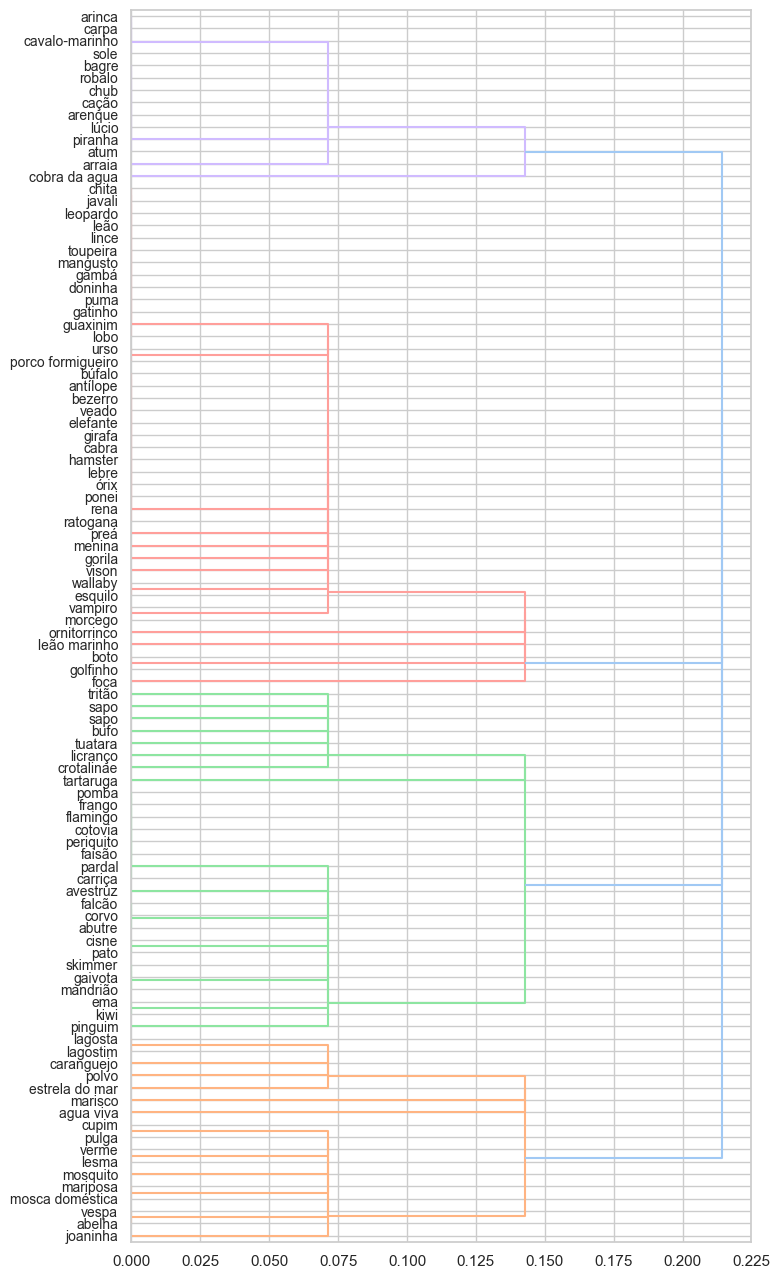

In [16]:
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df_temp.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [17]:
fcluster(Z, .1, criterion='distance')

array([ 9,  9, 13,  9,  9,  9,  9, 13, 13,  9,  9,  5, 13,  3,  2,  2,  5,
        9, 13,  8,  5,  5,  9,  5,  1,  6,  6,  9,  9,  9,  1,  9,  9,  5,
       13,  9,  9,  5, 13,  1,  1,  5,  1,  5,  9,  9,  2,  9,  9,  9,  9,
        1,  6,  2,  9,  9,  5,  5,  5,  5, 13, 13,  6, 10,  9,  9,  8,  9,
        9,  9,  9,  5, 13, 12, 11, 14,  4,  5,  5,  6,  1, 13,  5,  9,  2,
       13,  5,  1,  6,  7,  6, 13,  9,  9,  5,  9,  1,  9,  1,  5],
      dtype=int32)

In [18]:
from sklearn import metrics

In [19]:
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.rand_score(labels, y):.3f}")

k=44 corte=0.05 - rand index=0.812
k=14 corte=0.1 - rand index=0.950
k=14 corte=0.125 - rand index=0.950
k=4 corte=0.15 - rand index=0.946
k=1 corte=0.25 - rand index=0.236


In [20]:
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.adjusted_rand_score(labels, y):.3f}")

k=44 corte=0.05 - rand index=0.278
k=14 corte=0.1 - rand index=0.852
k=14 corte=0.125 - rand index=0.852
k=4 corte=0.15 - rand index=0.862
k=1 corte=0.25 - rand index=0.000


## Segmentação de Clientes no Varejo

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Quando passamos a pensar em Clustering como um Projeto de Ciência de Dados, podemos expandir esses passos e considerar a estrutura da **Metodologia CRISP-DM**:
* Contextualização de Negócios
* Entendimento dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação
* Deployment/Entrega



In [21]:
import pandas as pd
from itertools import product

In [22]:
df = pd.read_csv('./data/dados_clientes.csv')
df.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


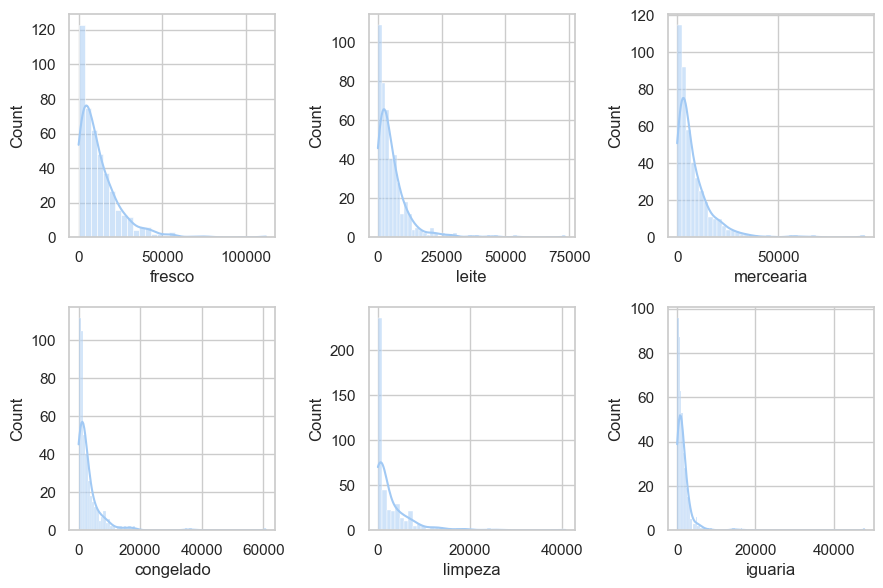

In [23]:
fig, axs = plt.subplots(2,3, figsize=(9,6))

pos = list(product(range(2), range(3)))

for i, c in enumerate(df.columns[2:]):
    sns.histplot(data=df, x=c, kde=True, ax=axs[pos[i]])
plt.tight_layout()
plt.show()

In [24]:
df.describe()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [25]:
df[df.iguaria > 2000].sort_values(by=['iguaria'])

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
300,2,2,16448,6243,6360,824,2662,2005
61,2,3,35942,38369,59598,3254,26701,2017
281,2,3,12238,7108,6235,1093,2328,2079
430,1,3,3097,4230,16483,575,241,2080
9,2,3,6006,11093,18881,1159,7425,2098
...,...,...,...,...,...,...,...,...
181,1,3,112151,29627,18148,16745,4948,8550
87,1,3,43265,5025,8117,6312,1579,14351
71,1,3,18291,1266,21042,5373,4173,14472
23,2,3,26373,36423,22019,5154,4337,16523


In [26]:
df.iloc[:, 2:].sum(axis=1)

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64

In [27]:
df_new = df.copy()
df_new['total'] = df.iloc[:, 2:].sum(axis=1)

In [28]:
df_new.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [29]:
for c in df_new.columns[2:8]:
    df_new[f'perc_{c}'] = df_new[c]/df_new['total']

In [30]:
df_new

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067
436,1,3,39228,1431,764,4510,93,2346,48372,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499
437,2,3,14531,15488,30243,437,14841,1867,77407,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119
438,1,3,10290,1981,2232,1038,168,2125,17834,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154


In [31]:
df_rel = df_new.iloc[:, -6:]

In [32]:
from sklearn.cluster import KMeans

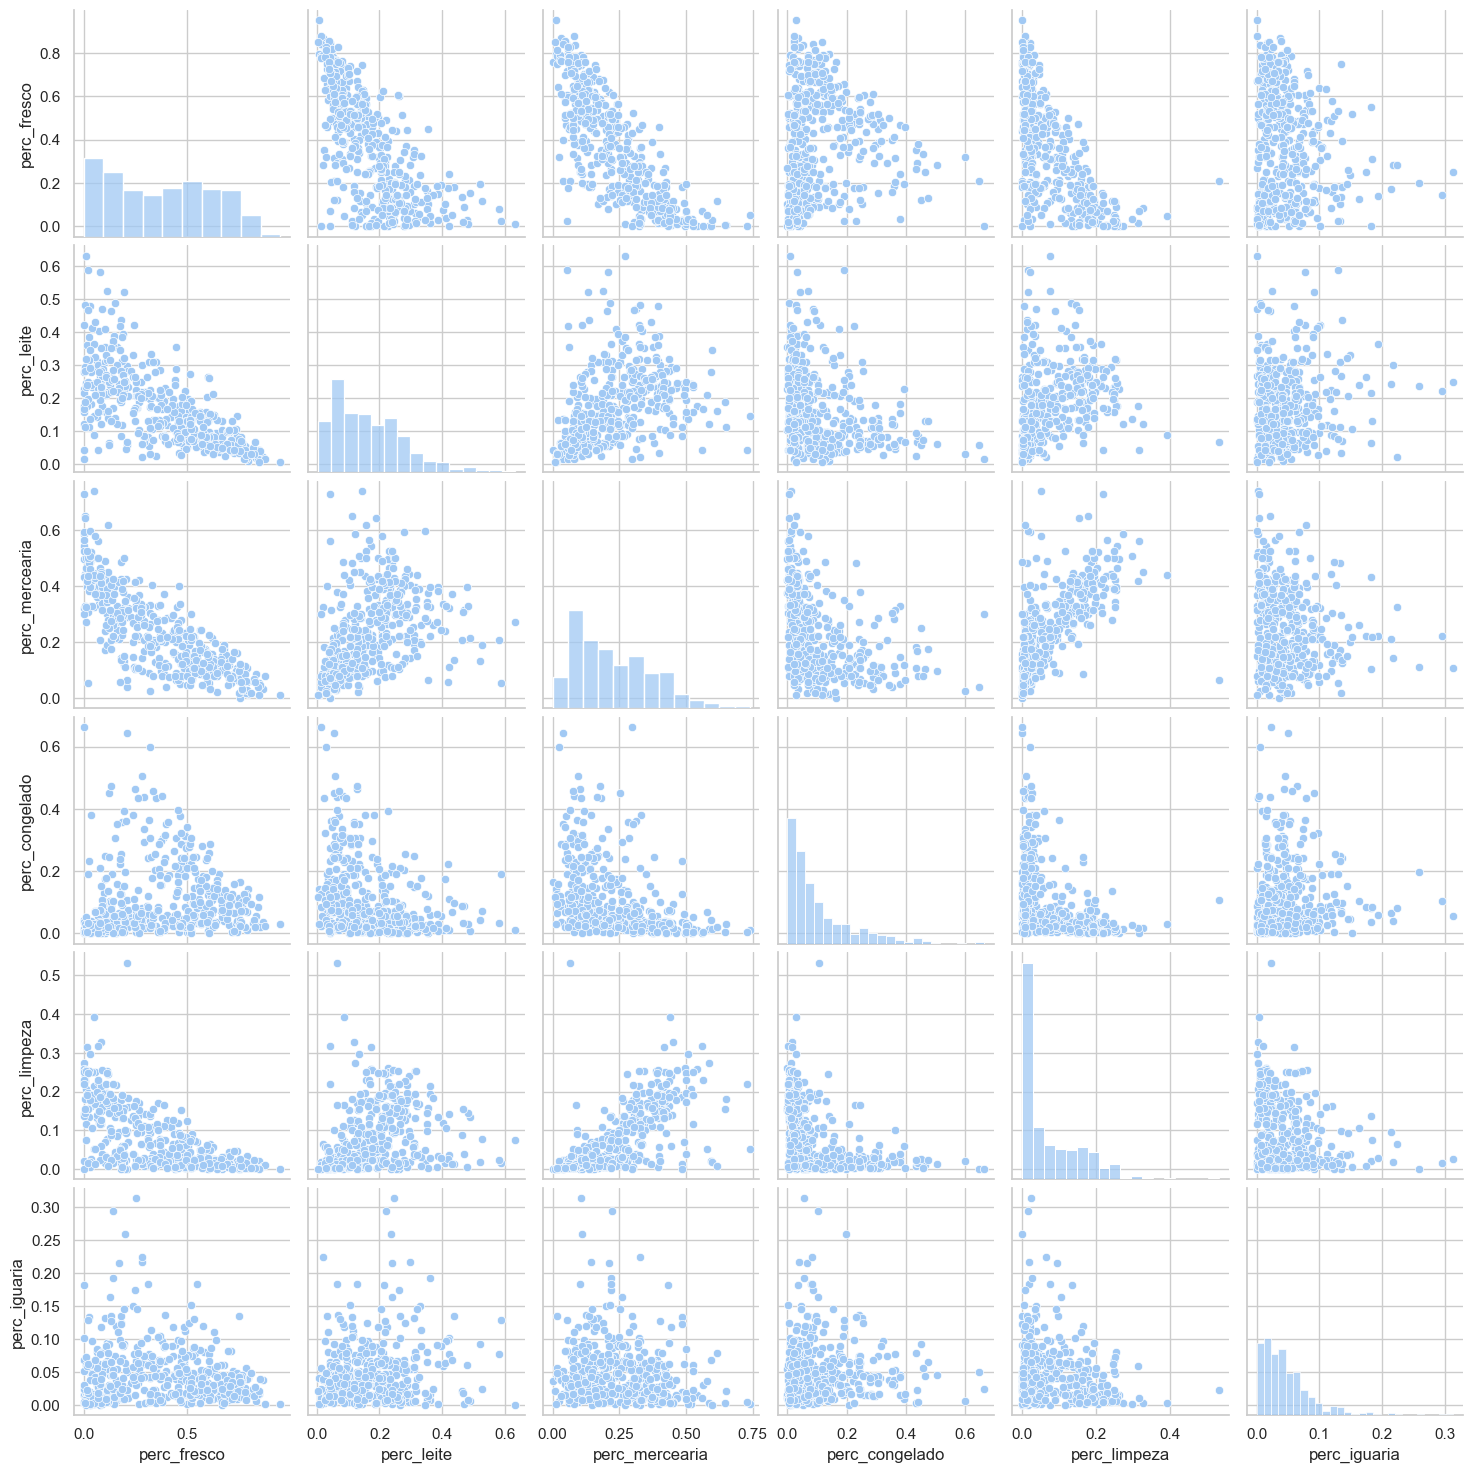

In [33]:
sns.pairplot(df_rel);

In [34]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_


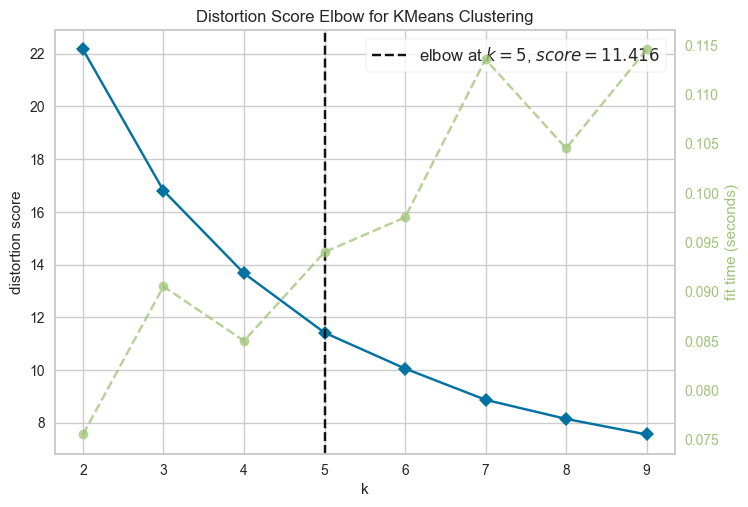

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(df_rel) 
visualizer.show(); 

In [36]:
kmeans = KMeans(n_clusters=5, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_


In [37]:
df_rel['cluster'] = labels

In [38]:
df_rel.groupby('cluster').mean()

,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
cluster,,,,,,
0,0.399785,0.170213,0.243198,0.057114,0.075121,0.054570
1,0.676736,0.076751,0.100398,0.092001,0.018154,0.035960
2,0.089974,0.223574,0.434159,0.036377,0.179088,0.036828
3,0.374978,0.101027,0.132208,0.320761,0.023751,0.047274
4,0.141919,0.357629,0.248495,0.095108,0.068779,0.088070


In [39]:
from sklearn.decomposition import PCA

In [40]:
# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_rel)

print(pca.explained_variance_ratio_)

[0.94471832 0.04119395]


In [41]:
k=5
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

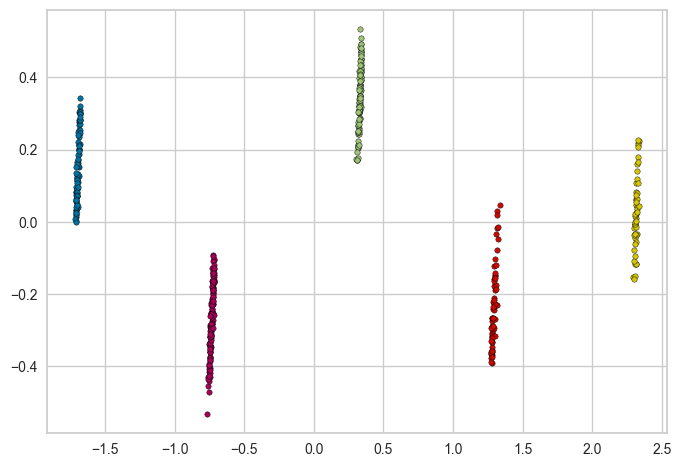

In [42]:
# Dados Reais
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();
   

## Segmentação de Imagens Médicas

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Quando passamos a pensar em Clustering como um Projeto de Ciência de Dados, podemos expandir esses passos e considerar a estrutura da **Metodologia CRISP-DM**:
* Contextualização de Negócios
* Entendimento dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação
* Deployment/Entrega



In [43]:
import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="pastel")
%matplotlib inline

import cv2
import glob
import csv

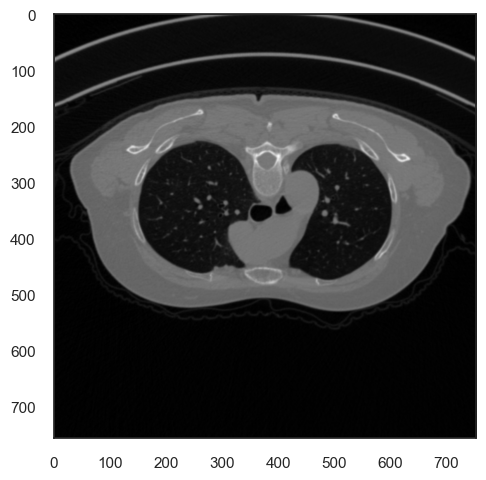

In [44]:
exam_path = './data/medical/slice001.png'
image = cv2.imread(exam_path)
plt.imshow(image);

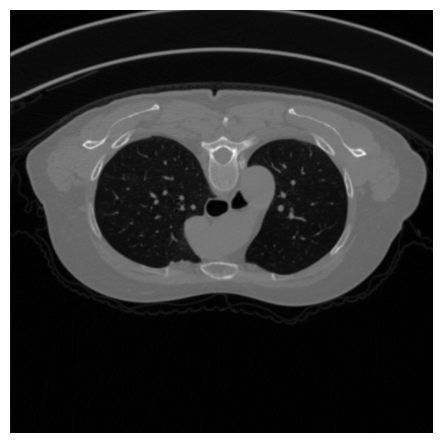

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray");
plt.axis('off');

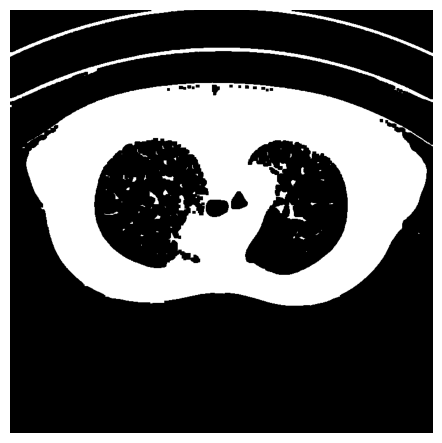

In [46]:
_ , mask = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((5, 5), np.uint8))
plt.imshow(mask, cmap = "gray")
plt.axis('off')
cv2.imwrite('./data/medical/thresholding.png', cv2.hconcat([image, np.stack((mask, mask, mask), axis=2)]));


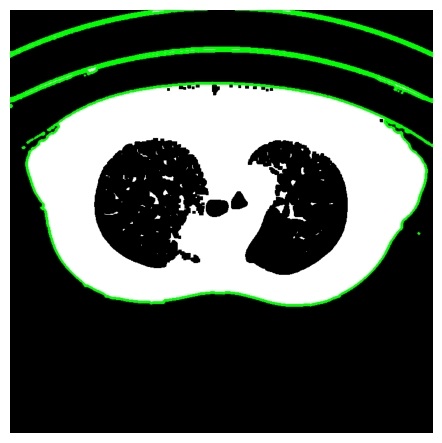

In [47]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

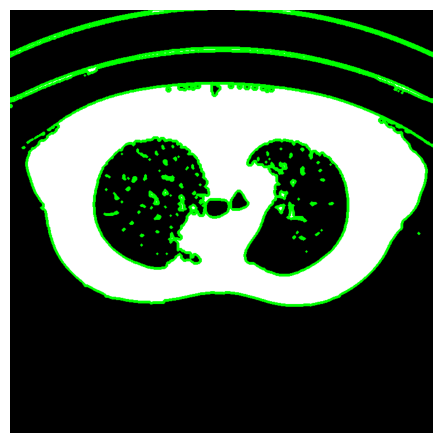

In [48]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = mask.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 3)
plt.imshow(contours_img_before_filtering)
plt.axis('off');

In [53]:
filtered_contours = []
df_mean_color = pd.DataFrame()
for idx, contour in enumerate(contours):
    area = int(cv2.contourArea(contour))

    sz=4000
    if (area > sz) & (area < 20*sz):
        filtered_contours.append(contour)
        # get mean color of contour:
        masked = np.zeros_like(image[:, :, 0])  
        cv2.drawContours(masked, [contour], 0, 255, -1)

        B_mean, G_mean, R_mean, _ = cv2.mean(image, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

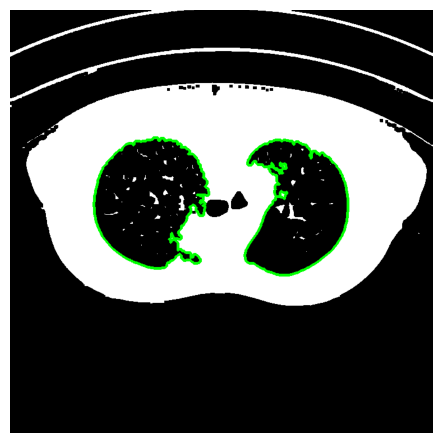

In [54]:
contours_img_after_filtering = mask.copy()
contours_img_after_filtering = cv2.cvtColor(contours_img_after_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_after_filtering, tuple(filtered_contours), -1, (0, 255, 0), 3)

plt.imshow(contours_img_after_filtering)
plt.axis('off')

cv2.imwrite('./data/medical/contours.png', cv2.hconcat([contours_img_before_filtering, contours_img_after_filtering]));

In [55]:
km = KMeans(n_clusters=2)
df_mean_color['label'] = km.fit_predict(df_mean_color)

In [56]:
def draw_segmented_objects(image, contours, label_cnt_idx, bubbles_count):
    mask = np.zeros_like(image[:, :, 0])
    cv2.drawContours(mask, [contours[i] for i in label_cnt_idx], -1, (255), -1)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    masked_image = cv2.putText(masked_image, f'{bubbles_count} bubbles', (200, 1200), cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale = 3, color = (255, 255, 255), thickness = 10, lineType = cv2.LINE_AA)
    return masked_image

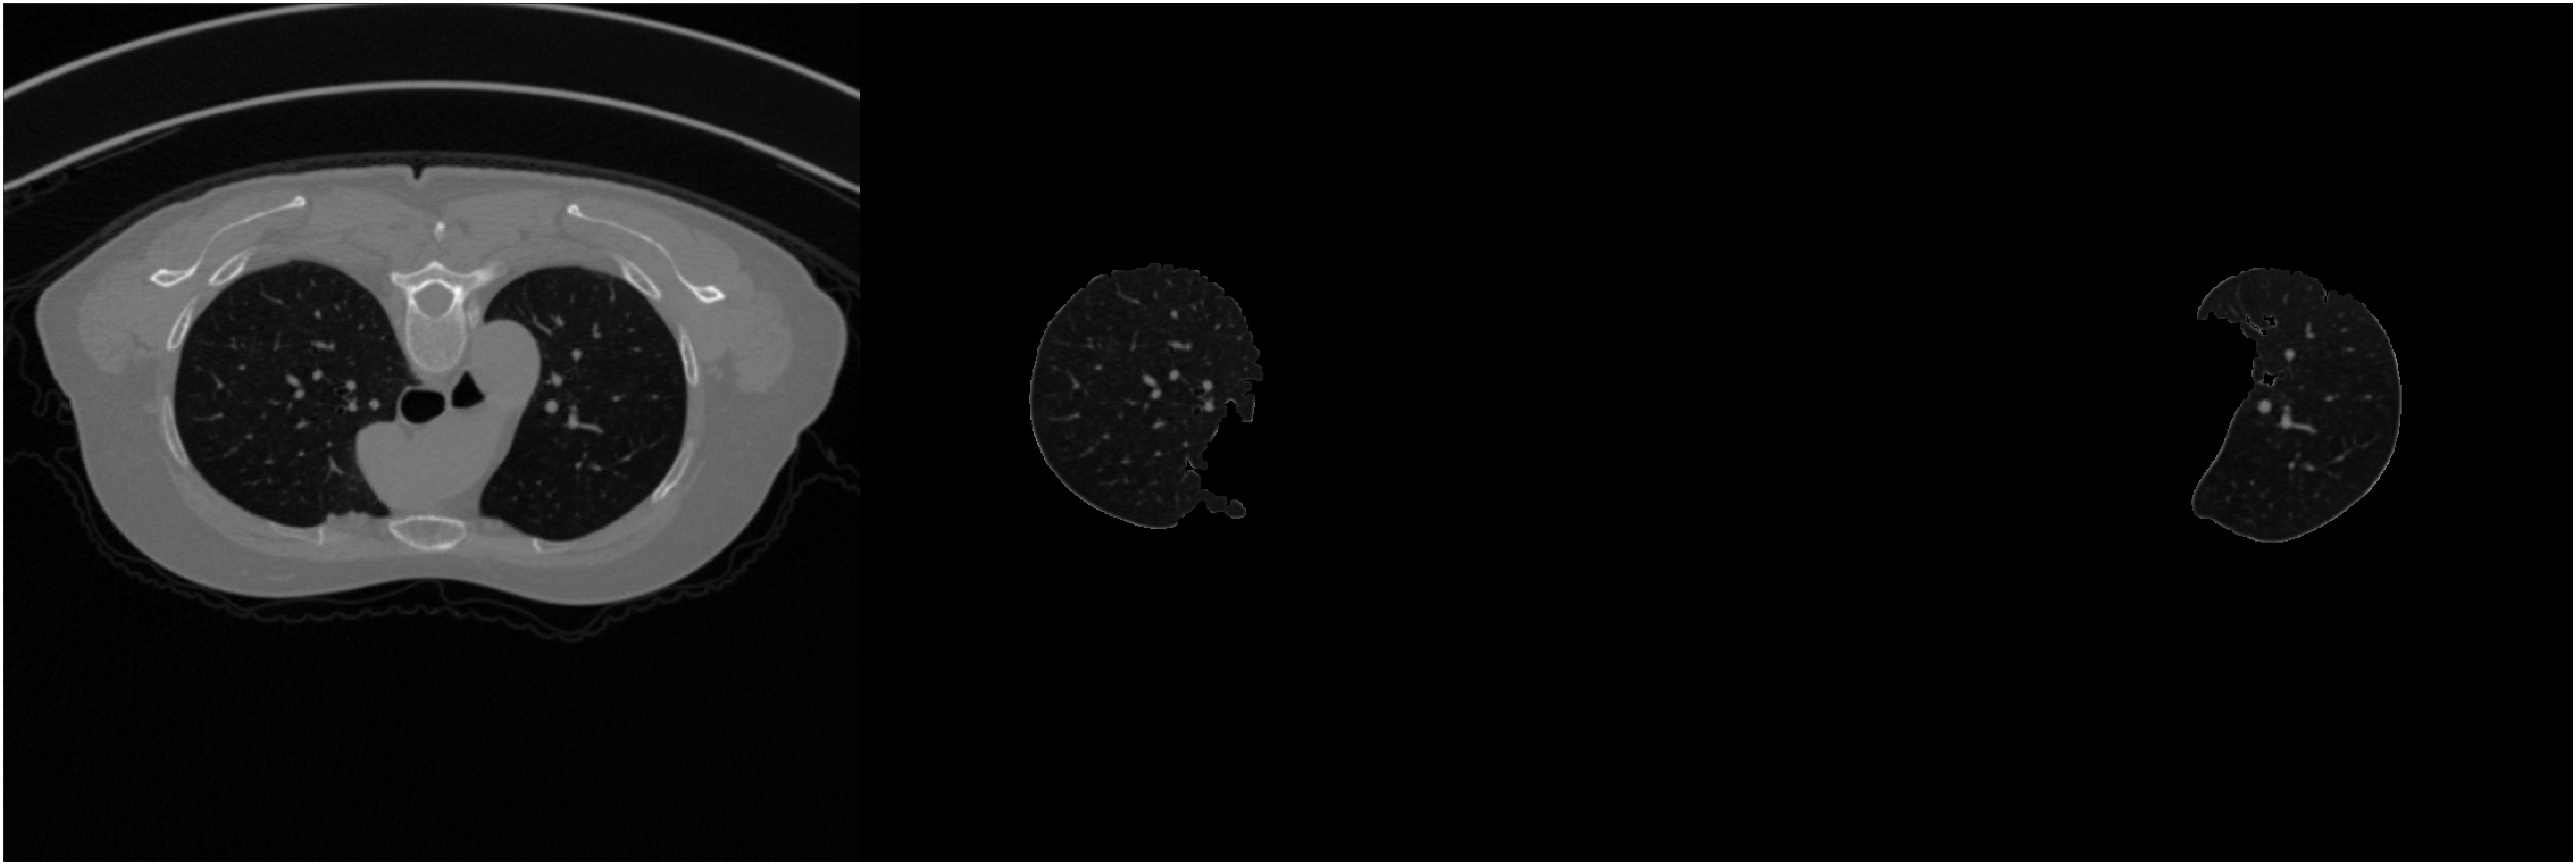

In [58]:
img = image.copy()
plt.figure(figsize = (100,40))
for label, df_grouped in df_mean_color.groupby('label'):
    bubbles_amount = len(df_grouped)
    masked_image = draw_segmented_objects(image, contours, df_grouped.index, bubbles_amount)
    #temp = np.invert(masked_image)
    img = cv2.hconcat([img, masked_image])
    

cv2.imwrite('./data/medical/color_segmentation.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.axis('off');

## Categorização de Notícias

O processo de Análise de Clusters pode ser dividido em quatro partes, que podem ser revisitadas a qualquer momento, sendo elas: **Representação de Dados**, **Selecionar Medida de Proximidade**, **Selecionar Algoritmo** e **Avaliar os Grupos Encontrados**. 

Quando passamos a pensar em Clustering como um Projeto de Ciência de Dados, podemos expandir esses passos e considerar a estrutura da **Metodologia CRISP-DM**:
* Contextualização de Negócios
* Entendimento dos Dados
* Preparação dos Dados
* Modelagem
* Avaliação
* Deployment/Entrega



In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('./data/news/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [61]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [62]:
total_categorias = df.category.value_counts().values
total_categorias

array([511, 510, 417, 401, 386], dtype=int64)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

In [64]:

t0 = time()
X_tfidf = vectorizer.fit_transform(df.text)
print(f"vetorização completa em {time() - t0:.3f} s")
print(f"n_observacoes: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vetorização completa em 1.522 s
n_observacoes: 2225, n_features: 9136


Depois de ignorarmos as palavras ou termos que aparecem em mais de 50% dos documentos (```max_df=0.5```) e termos que não aparecem em ao menos 5 documentos (```min_df=5```), o número de variáveis encontradas é pouco mais de 9 mil. Podemos também quantificar o quão esparsa a matriz X_tfidf dividindo o total de células com valores diferentes de zero pelo total de células.

In [65]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.014


In [66]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=5,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Número de elementos em cada cluster: {cluster_sizes}")
print()
print(
    "Número de documentos em cada cluster real: "
    f"{total_categorias}"
)

Número de elementos em cada cluster: [405 561 353 396 510]
Número de elementos em cada cluster: [339 377 723 270 516]
Número de elementos em cada cluster: [515 140 893 364 313]
Número de elementos em cada cluster: [829 373 154 499 370]
Número de elementos em cada cluster: [271 822 491 272 369]

Número de documentos em cada cluster real: [511 510 417 401 386]


Uma forma de deixar o K-means mais estável é utilizar o ```TruncatedSVD```. Como os resultados do TrucatedSVD não são normalizados, é necessário também refazer esse passo. Essa operação de reduzir a dimensionalidade do TF-IDF é normalmente chamada de Latent Semant Analysis (LSA) na literatura de Análise de Texto (Text Mining) ou Processamento de Linguagem Natural (Natural Language Processing, NLP).

In [67]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA concluido em {time() - t0:.3f} s")
print(f"Variação explicado do SVD: {explained_variance * 100:.1f}%")

LSA concluido em 2.113 s
Variação explicado do SVD: 26.3%


In [68]:
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(X_lsa)
    labels = kmeans_model.labels_
    print(f"k={i} - silhueta={metrics.silhouette_score(X_lsa, labels, metric='euclidean'):.3f}")
    print(f"k={i} - rand_index={metrics.adjusted_rand_score(df.category.values, labels):.3f}")
    print(20*' * ')

k=2 - silhueta=0.041
k=2 - rand_index=0.315
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=3 - silhueta=0.051
k=3 - rand_index=0.416
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=4 - silhueta=0.059
k=4 - rand_index=0.667
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=5 - silhueta=0.070
k=5 - rand_index=0.910
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=6 - silhueta=0.072
k=6 - rand_index=0.868
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=7 - silhueta=0.074
k=7 - rand_index=0.821
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=8 - silhueta=0.073
k=8 - rand_index=0.625
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
k=9 - silhueta=0.075
k=9 - rand_index=0.626
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 


Os resultados do TfidfVectorizer pode ser invertidos. Com isso é possível a gente ter uma noção de quais são as palavras mais importantes de cada cluster. 

In [70]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=1,
    random_state=seed,
).fit(X_lsa)

labels = kmeans.labels_

In [71]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: film best band tv music awards star award actor album 
Cluster 1: game club chelsea cup play win match players arsenal open 
Cluster 2: mr labour election blair government party brown people minister howard 
Cluster 3: england wales ireland rugby france world nations robinson game coach 
Cluster 4: mr company people firm market new sales growth mobile bank 


In [72]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

### Referências:
https://www.kaggle.com/datasets/pariza/bbc-news-summary
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py